In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

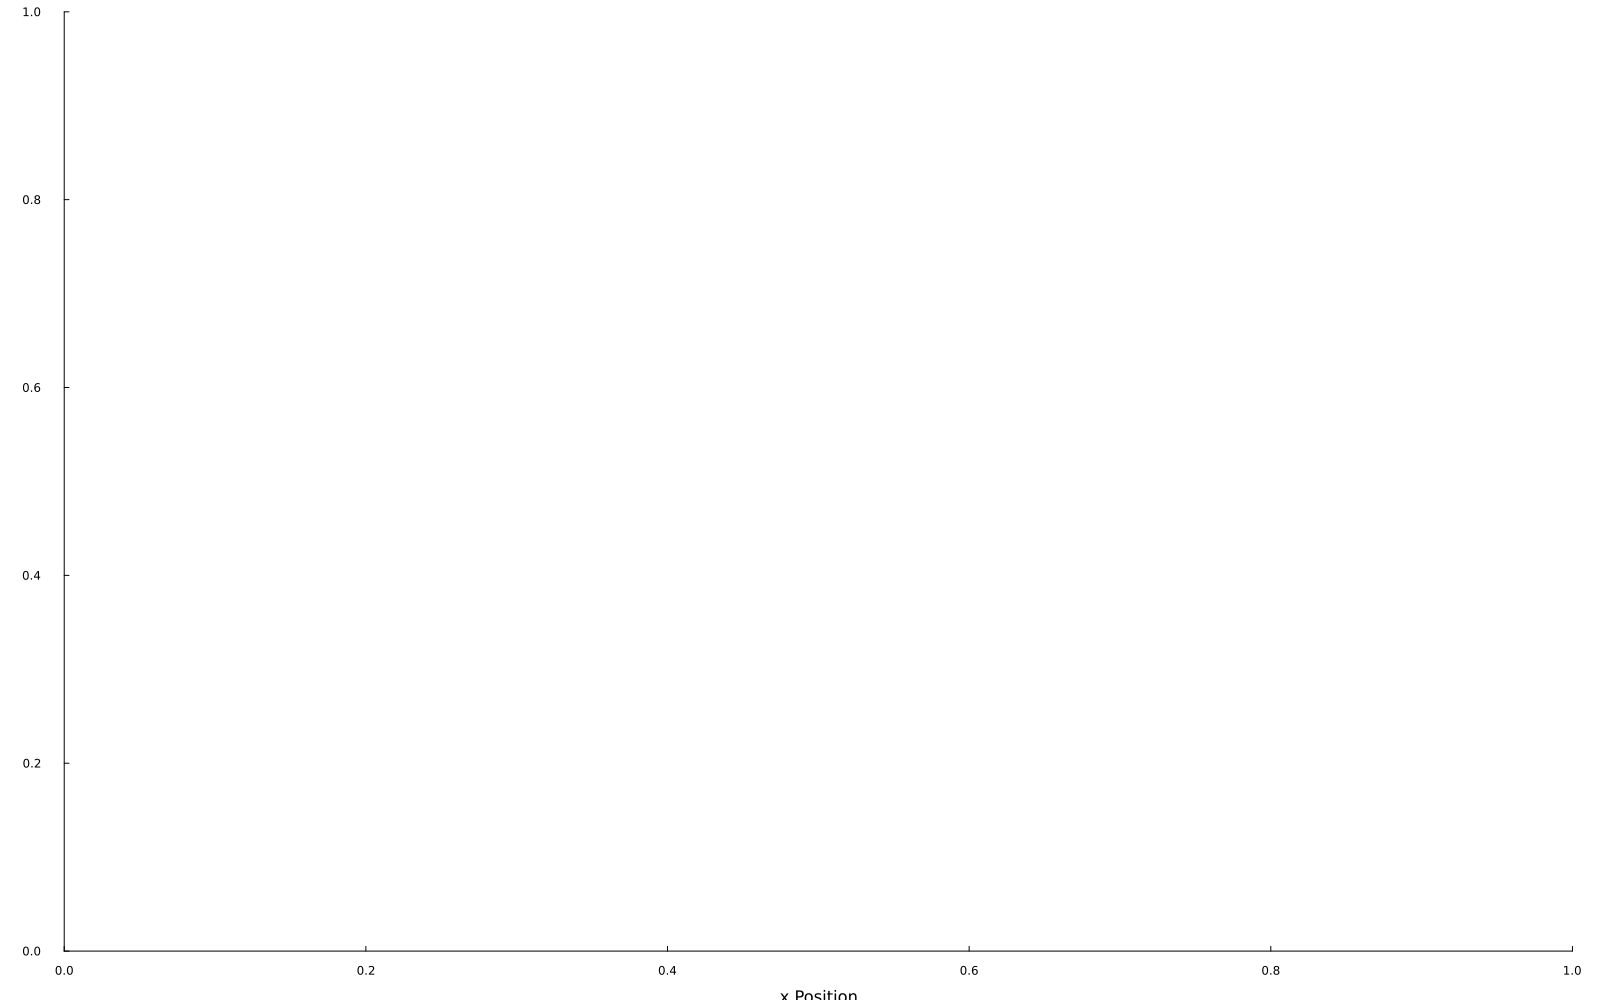

In [4]:
# Define the plot
num_points = 50
grid_size = (num_points + 1, num_points + 1)

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 4
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

In [5]:
ops = gaussian_operators_2D(0.2, plt_grid_x1, plt_grid_x2)

# ops = fourier_operators_2D(6, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 24.999999999999996), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 24.999999999999996), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 24.999999999999996), 26

## Pre-certificate

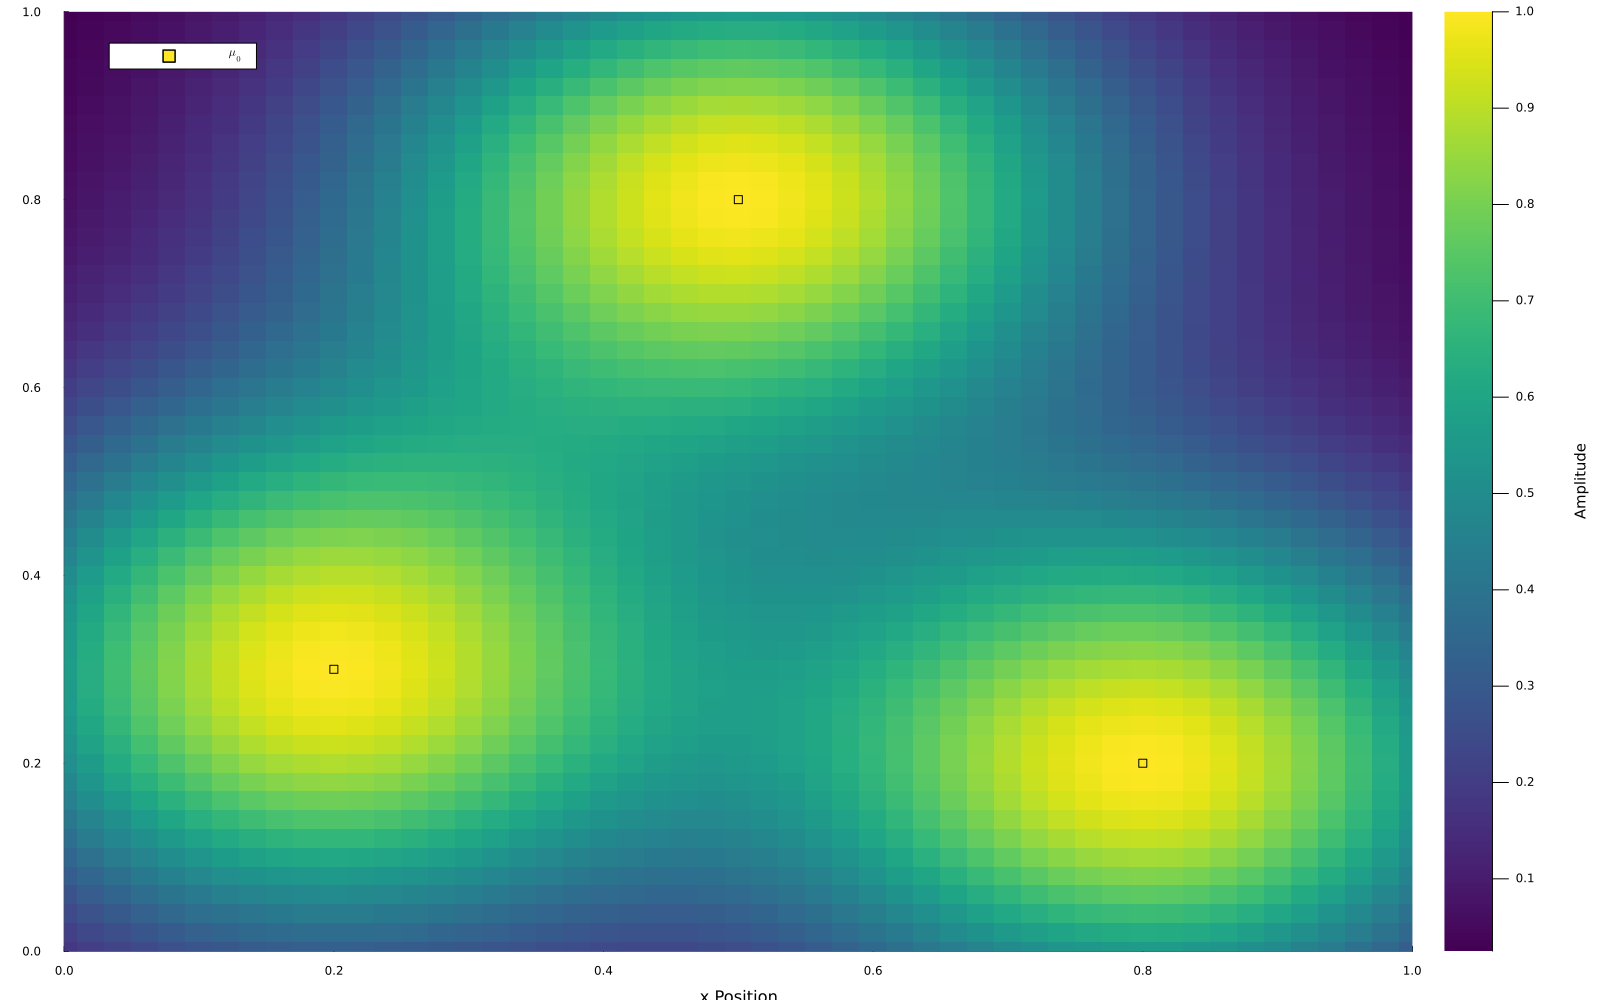

In [6]:
x0 = [[0.2, 0.5, 0.8], [0.3, 0.8, 0.2]]
a0 = [1.0, 1.0, 1.0]


μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
scatter!(plt_cert, μ0.x..., label=L"μ_0", zcolor=μ0.a, color=:viridis, marker=:square, markerstrokewidth=0.5)

In [7]:
maximum(abs.(ηV))

1.000000000000001

### Observation

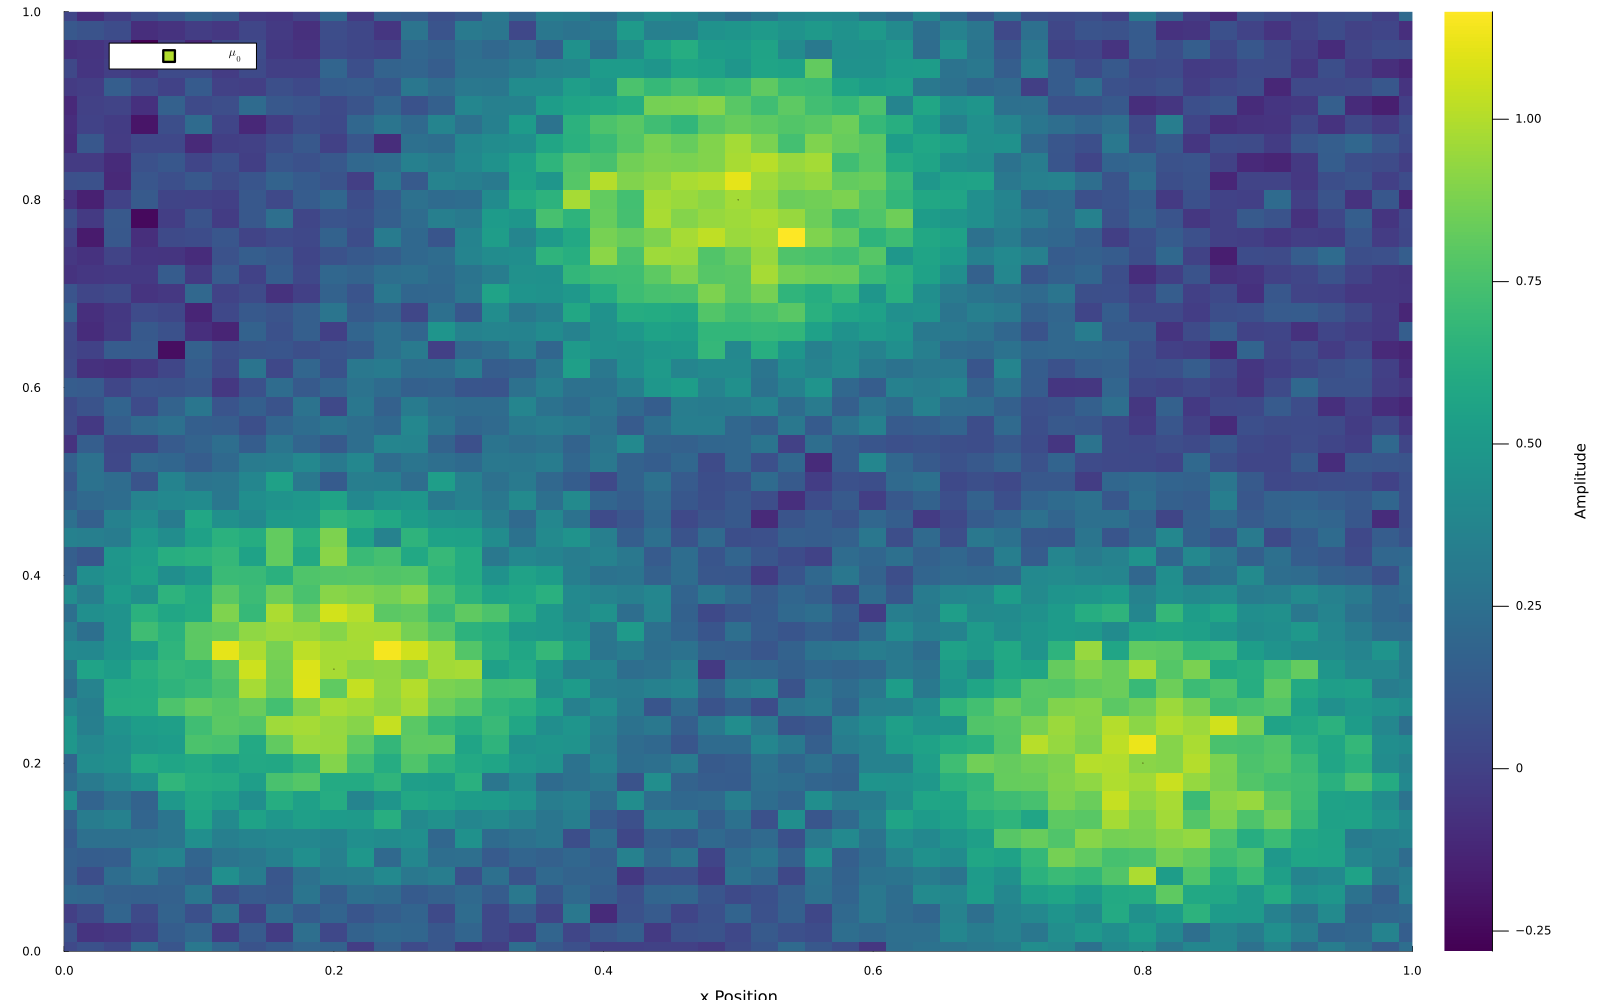

In [8]:
y0 = ops.Φ(μ0...)

function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

# Add noise to the observation y = y0 + w
noise_level = 0.2
y = add_noise(y0, noise_level)

plt_obs = deepcopy(plt)

# heatmap!(plt_obs, grid, grid, ops.adjΦ(y), color=:viridis)
heatmap!(plt_obs, grid, grid, reshape(y, grid_size...), color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0", marker=:square)

In [9]:
prob = BLASSO(y, ops, domain)

BLASSO([0.03633369475257991, 0.07926884890967409, -0.016497574077996097, 0.21057026084422115, 0.15050471756160264, 0.15683636175589652, 0.13095449401381176, 0.16305293604234886, 0.42818276111384124, 0.22550337198077106  …  0.0497278622120241, -0.01546557433348517, 0.03135659246765434, 0.05175223992487832, -0.012168993279584817, -0.06381685965184399, -0.13158043956564347, 0.042839775383437737, -0.08889469530643915, 0.21177260357302163], Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 24.999999999999996), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 24.999999999999996), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, I

In [10]:
noise_levels = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
λs = 20 * noise_levels

markersizes = 0.5 .+ 2 * noise_levels.^(1 / 3)

using ColorSchemes
cs = ColorSchemes.Winter
colors = get(cs, noise_levels .^ (1 / 3), :extrema)

Noise level: 0.01, λ: 0.2, μ: [[0.20001208056133365, 0.5000321364336262, 0.8000568086875018], [0.30004068678615664, 0.800069341851822, 0.19993214196603118]]
Noise level: 0.02, λ: 0.4, μ: [[0.20002426443307902, 0.5000645400466093, 0.8001138031530071], [0.30008162848790654, 0.8001391237778875, 0.19986411475425922]]
Noise level: 0.03, λ: 0.6, μ: [[0.20003655278429763, 0.5000972139554822, 0.8001709842946104], [0.30012282752312897, 0.8002093499299311, 0.19979591790060483]]
Noise level: 0.04, λ: 0.8, μ: [[0.20004894679780394, 0.5001301613175858, 0.800228353010313], [0.30016428633314296, 0.8002800244925998, 0.1997275509327239]]
Noise level: 0.05, λ: 1.0, μ: [[0.20006144767775014, 0.5001633853419101, 0.8002859102081049], [0.30020600739344916, 0.8003511517149718, 0.19965901338579337]]
Noise level: 0.06, λ: 1.2, μ: [[0.20007405664283986, 0.5001968892825633, 0.8003436567999609], [0.30024799320975915, 0.8004227358914873, 0.1995903047900128]]
Noise level: 0.07, λ: 1.4000000000000001, μ: [[0.2000867

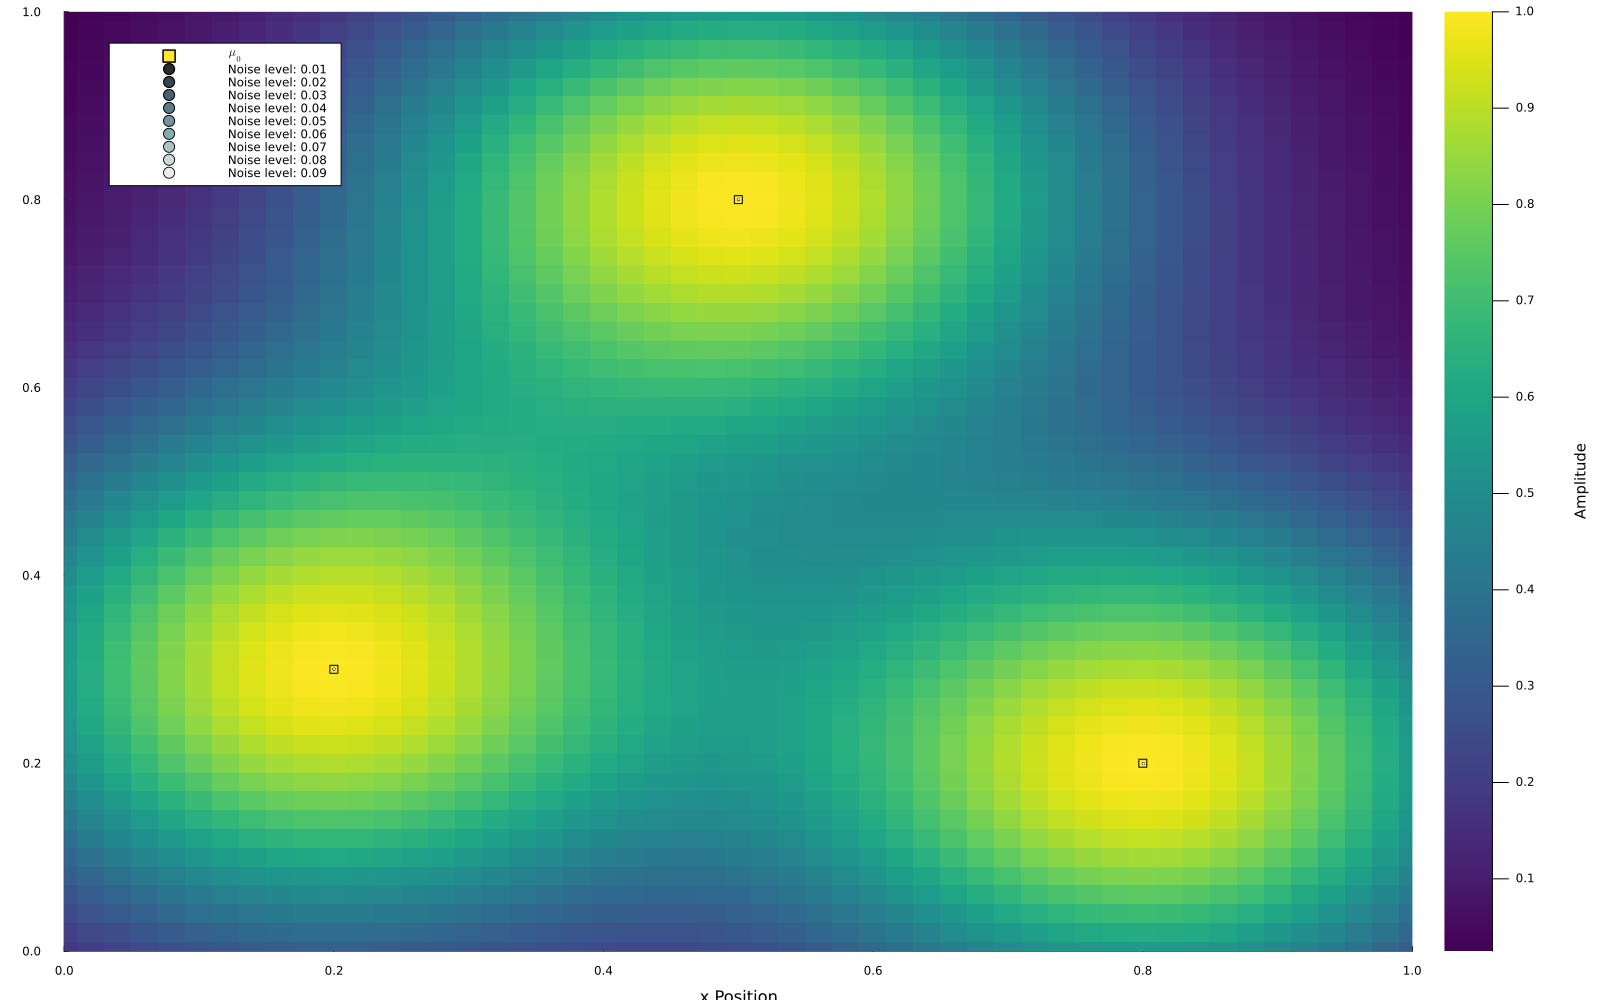

In [11]:
plt_cert_behav = deepcopy(plt_cert)

for (i, noise_level) in enumerate(noise_levels)
    Random.seed!(1)
    prob.y = add_noise(y0, noise_level)
    prob.λ = λs[i]
    solve!(prob, :SFW, δ=noise_level, τ=12, q=0.9, options=Dict(:maxits => 4))
    scatter!(plt_cert_behav, prob.μ.x..., color=colors[i], marker=:circle, markersize=markersizes[i], markerstrokewidth=0.1, label="Noise level: $(noise_level)")
    println("Noise level: $(noise_level), λ: $(prob.λ), μ: $(prob.μ.x)")
end

display(plt_cert_behav)

In [20]:
Random.seed!(1)
prob.y = add_noise(y0, 0.01)
prob.λ = 0.2
solve!(prob, :SFW, options=Dict(:maxits => 4))

prob.μ

DiscreteMeasure([[0.20001208056133365, 0.5000321364336262, 0.8000568086875018], [0.30004068678615664, 0.800069341851822, 0.19993214196603118]], [0.9990516166666253, 0.9987074670733448, 0.9995759622909065], 2, 3)